In [33]:
import os
import numpy as np
import pandas as pd
import cv2

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from skimage.metrics import structural_similarity as ssim
import tensorflow as tf

In [34]:
df_img_info = pd.read_csv('img_info.csv')
df_sal_info = pd.read_csv('sal_info.csv')

In [37]:
# pour les images
# Groupe by par Model 
model_img = df_img_info.groupby(df_img_info.Model)
img_MV2 = model_img.get_group('MobileNetV2')
#img_VGG16 = model_img.get_group('VGG16')
#img_ResNet = model_img.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
attaque_img_MV2 = img_MV2.groupby(["Attaque"])
img_MV2_PGD = attaque_img_MV2.get_group('PGD')
#img_MV2_FGSM = attaque_img_MV2.get_group('FGSM')

#attaque_img_VGG16 = img_VGG16.groupby(["Attaque"])
#img_VGG16_PGD = attaque_img_VGG16.get_group('PGD')
#img_VGG16_FGSM = attaque_img_VGG16.get_group('FGSM')

#attaque_img_ResNet = img_ResNet.groupby(["Attaque"])
#img_ResNet_PGD = attaque_img_ResNet.get_group('PGD')
#img_ResNet_FGSM = attaque_img_ResNet.get_group('FGSM')


In [38]:
# pour les saillance
# Groupe by par Model 
model_sal = df_sal_info.groupby(df_sal_info.Model)
sal_MV2 = model_sal.get_group('MobileNetV2')
#sal_VGG16 = model_sal.get_group('VGG16')
#sal_ResNet = model_sal.get_group('ResNet152V2')

# Groupe by par attaque sur les modèles
attaque_sal_MV2 = sal_MV2.groupby(["Attaque"])
sal_MV2_PGD = attaque_sal_MV2.get_group('PGD')
#sal_MV2_FGSM = attaque_sal_MV2.get_group('FGSM')

#attaque_sal_VGG16 = sal_VGG16.groupby(["Attaque"])
#sal_VGG16_PGD = attaque_sal_VGG16.get_group('PGD')
#sal_VGG16_FGSM = attaque_sal_VGG16.get_group('FGSM')

#attaque_sal_ResNet = sal_ResNet.groupby(["Attaque"])
#sal_ResNet_PGD = attaque_sal_ResNet.get_group('PGD')
#sal_ResNet_FGSM = attaque_sal_ResNet.get_group('FGSM')

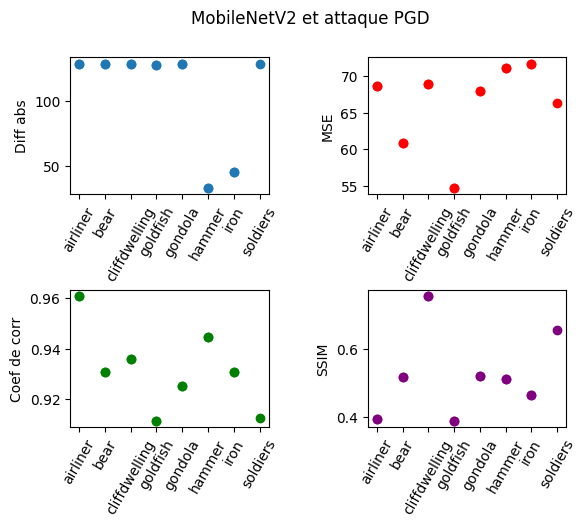

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque PGD sur les images')
ax1.scatter(img_MV2_PGD["Objet"],df_img_info["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(img_MV2_PGD["Objet"],df_img_info["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(img_MV2_PGD["Objet"],df_img_info["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(img_MV2_PGD["Objet"],df_img_info["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)


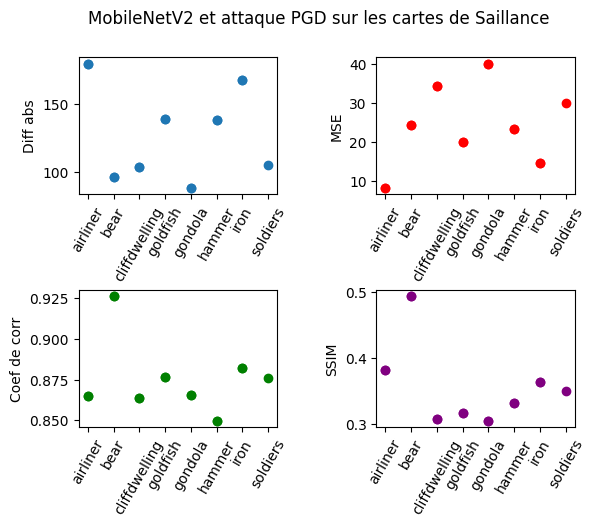

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('MobileNetV2 et attaque PGD sur les cartes de Saillance')
ax1.scatter(sal_MV2_PGD["Objet"],df_sal_info["Difference absolue"])
ax1.set_ylabel("Diff abs")
ax2.scatter(sal_MV2_PGD["Objet"],df_sal_info["MSE"], c = 'red')
ax2.set_ylabel("MSE")
ax3.scatter(sal_MV2_PGD["Objet"],df_sal_info["Coef de corrélation"], c = 'green')
ax3.set_ylabel("Coef de corr")
ax4.scatter(sal_MV2_PGD["Objet"],df_sal_info["SSIM"], c = 'purple')
ax4.set_ylabel("SSIM")

for ax in (ax1, ax2,ax3,ax4):
    ax.tick_params(axis='x', rotation=60)

plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

In [19]:
from tf_keras_vis.utils.scores import CategoricalScore

def get_score_function(index_list):
    return CategoricalScore(index_list)

index_images_model = [404, 294, 500, 1, 576, 587, 606, 413]
score_img_MV2 = []

for row in img_MV2.itertuples():
    if(row.Objet == 'airliner'):
        score_img_MV2.append(get_score_function([index_images_model[0]]))
    elif(row.Objet == 'bear'):
        score_img_MV2.append(get_score_function([index_images_model[1]]))
    elif(row.Objet == 'cliff_dwelling'):
        score_img_MV2.append(get_score_function([index_images_model[2]]))
    elif(row.Objet == 'goldfish'):
        score_img_MV2.append(get_score_function([index_images_model[3]]))
    elif(row.Objet == 'gondola'):
        score_img_MV2.append(get_score_function([index_images_model[4]]))
    elif(row.Objet == 'hammer'):
        score_img_MV2.append(get_score_function([index_images_model[5]]))
    elif(row.Objet == 'iron'):
        score_img_MV2.append(get_score_function([index_images_model[6]]))
    elif(row.Objet == 'soldiers'):
        score_img_MV2.append(get_score_function([index_images_model[7]]))
    
score_img_MV2
# TO DO , la valeur du categorical score est une adresse

In [61]:
from keras.utils import load_img
def get_image(path, size=(224,224), model_name="MobileNetV2"):
    image= load_img(path)
    image = tf.cast(image, tf.float32)
    return image

In [76]:
img_MV2

,Unnamed: 0,Objet,Model,Attaque,Intensité,Chemin,Difference absolue,MSE,Coef de corrélation,SSIM
0,0,airliner,MobileNetV2,PGD,2,c:\Users\lucie\Documents\Programmation\explica...,128.241284,68.665185,0.960599,0.393618
1,1,airliner,MobileNetV2,PGD,4,c:\Users\lucie\Documents\Programmation\explica...,128.241284,68.665185,0.960599,0.393618
2,2,bear,MobileNetV2,PGD,2,c:\Users\lucie\Documents\Programmation\explica...,128.355515,60.899554,0.930940,0.517929
3,3,bear,MobileNetV2,PGD,4,c:\Users\lucie\Documents\Programmation\explica...,128.355515,60.899554,0.930940,0.517929
4,4,cliffdwelling,MobileNetV2,PGD,2,c:\Users\lucie\Documents\Programmation\explica...,128.438297,68.894950,0.935967,0.756038
5,5,cliffdwelling,MobileNetV2,PGD,4,c:\Users\lucie\Documents\Programmation\explica...,128.438297,68.894950,0.935967,0.756038
6,6,goldfish,MobileNetV2,PGD,2,c:\Users\lucie\Documents\Programmation\explica...,127.344879,54.644538,0.911522,0.388965
7,7,goldfish,MobileNetV2,PGD,4,c:\Users\lucie\Documents\Programmation\explica...,127.344879,54.644538,0.911522,0.388965
8,8,gondola,MobileNetV2,PGD,2,c:\Users\lucie\Documents\Programmation\explica...,128.046882,67.959164,0.925214,0.520961
9,9,gondola,MobileNetV2,PGD,4,c:\Users\lucie\Documents\Programmation\explica...,128.046882,67.959164,0.925214,0.520961


In [75]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

for i in range(len(img_MV2)):
    image = get_image(img_MV2.Chemin[i])
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = image[None, ...]
        
    image_probs = pretrained_model.predict(image)
    _, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
    score_img_MV2.append(image_class)


1/1 [==============================] - 0s 66ms/step


 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.6574191,
 0.3994574,
 0.3994574,
 0.7955632,
 0.7955632,
 0.22201574,
 0.22201574,
 0.42716503,
 0.42716503,
 0.7258402,
 0.7258402,
 0.55539423,
 0.55539423,
 0.83653855,
 0.6574191,
 0.6574191,
 0.3994574,
 0.3994574,
 0.7955632,
 0.7955632,
 0.22201574,
 0.22201574,
 0.42716503,
 0.42716503,
 0.7258402,
 0.7258402,
 0.55539423,
 0.55539423,
 0.83653855,
 0.6574191,
 0.6574191,
 0.3994574,
 0.3994574,
 0.7955632,
 0.7955632,
 0.22201574,
 0.22201574,
 0.42716503,
 0.42716503,
 0.7258402,
 0.7258402,
 0.55539423,
 0.55539423,
 0.83653855,
 0.6574191,
 0.6574191,
 0.3994574,
 0.3994574,
 0.7955632,
 0.7955632,
 0.22201574,
 0.22201574,
 0.42716503,
 0.42716503,
 0.7258402,
 0.7258402,
 0.55539423,
 0.55539423,
 0.83653855,
 'shower_curtain',
 'shower_curtain',
 'shower_curtain',
 'shower_curtai

In [ ]:

get_image(row.Chemin,"MobileNetV2")
image = tf.cast(image, tf.float32)
image = tf.image.resize(image, (224, 224))
image = image[None, ...]
    
image_probs = pretrained_model.predict(image)
_, image_class, class_confidence = decode_predictions(image_probs, top=1)[0][0]
score_img_MV2.append(class_confidence)
